#### Problem Statement
The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes

#### Data Description and Background Information
- This is a private car sale data to perform Exploratory Data Analysis.
- Dataset contains data for more than 9.5K cars sale.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| car           | Manufacturer brand                                        | 
| price         | Seller's price                                            |  
| body          | Car body type                                             | 
| mileage       | car,s mileage                                             |   
| engV          | engine volume                                             |
| engType       | type of fuel                                              |
| registration  | whether car registered in Ukraine or not                  |
| year          | year of production                                        |
| model         | model name                                                |
| drive         | drive type                                                |

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing Dataset

In [2]:
car_sales=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", engine='python', encoding='latin-1')

#### Data Understanding

In [3]:
car_sales.shape #Number of rows and columns in data frame

(9576, 10)

#### Carsale Dataset have 9576 rows and 10 columns

In [4]:
car_sales.columns #Names of columns in data frame

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [5]:
car_sales.head() #Will return first 5 records

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
car_sales.tail() #WIll return last 5 records

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [7]:
car_sales.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


- We can see columns **"price", "mileage" and "year"** have count **9576** except column **"engV"** as this column having a count of **"9142"**. Seems this column has some missing values.
- Also price and mileage has minimum value as **zero** which is near to impossible.
- Here we need to clean this data before processing further for EDA.

In [8]:
car_sales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

- From above we can see that column **engV** and **drive** contains null values, so we need to handle this null values

### Pandas_Profiling

In [26]:
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(output_file="car_sales_before_processing.html")

![title](Profiling_before_process.jpg)

### Data Cleaning

In [9]:
car_sales.replace({'engType':'Other','price':'0','mileage':'0'},np.nan,inplace=True)

In [10]:
car_sales.drop_duplicates(inplace=True)
car_sales.shape

(9463, 10)

- Replacing missing value for ***price*** column

In [11]:
def get_median_price(x):
    brand=x.name[0]
    if x.count()>0:
        return x.median()    #Return median for a model if exist
    elif car_sales.groupby(['car'])['price'].count()[brand]>0:
        brand_median=car_sales.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median
    else:
        return car_sales['price'].median()

price_median=car_sales.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price':'price_med'},inplace=True)
price_median.head()

,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [12]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car']==x['car'])&(price_median['model']==x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
car_sales['price']=car_sales.apply(fill_with_median, axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,NaN,yes,2013,E-Class,NaN


- Replacing missing value for ***engV*** column

In [13]:
def get_median_engV(x):
    brand=x.name[0]
    if x.count()>0:
        return x.median()
    elif car_sales.groupby(['car'])['engV'].count()[brand]>0:
        brand_median=car_sales.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median
    else:
        return car_sales['engV'].median()
    
engV_median=car_sales.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV':'engV_med'},inplace=True)
engV_median.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,car,model,engV_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [14]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car']==x['car'])&(engV_median['model']==x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
car_sales['engV']=car_sales.apply(fill_with_median,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,NaN,yes,2013,E-Class,NaN


- Replacing missing value for ***mileage*** column

In [15]:
def get_median_mileage(x):
    brand=x.name[0]
    if x.count()>0:
        return x.median()
    elif car_sales.groupby(['car'])['mileage'].count()[brand]>0:
        brand_median=car_sales.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median
    else:
        return car_sales['mileage'].median()
    
mileage_median=car_sales.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage':'mileage_med'},inplace=True)
mileage_median.head()

,car,model,mileage_med
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [16]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car']==x['car'])&(mileage_median['model']==x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
car_sales['mileage']=car_sales.apply(fill_with_median,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,NaN,yes,2013,E-Class,NaN


- Replacing missing values for ***drive***

In [17]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()
    elif car_sales.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = car_sales.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode
    else:
        return car_sales['drive'].mode()
    
drive_modes = car_sales.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [18]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
car_sales['drive'] = car_sales.apply(fill_with_mode, axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,NaN,yes,2013,E-Class,rear


- Replacing missing values for ***engType***

In [19]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()
    elif car_sales.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = car_sales.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode
    else:
        return car_sales['engType'].mode()
    
engType_modes = car_sales.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Petrol


In [20]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
car_sales['engType'] = car_sales.apply(fill_with_mode, axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Diesel,yes,2013,E-Class,rear


### Pandas_Profiling after cleaning data

In [54]:
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(output_file="carsale_after_preprocessing.html")

- We can see the below report after processing with missing and duplicate values

![title](Profiling_after_process.jpg)

Text(0.5, 1.0, 'Top 10 car brands on sale')

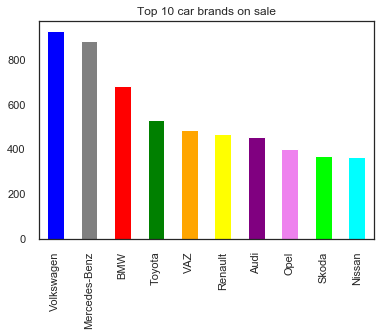

In [181]:
car_sales.car.value_counts().head(10).plot.bar(color=('blue','gray','red','green','orange','yellow','purple','violet','lime','aqua'))
plt.title("Top 10 car brands on sale")

In [138]:
top10_highest_price_selling_car=car_sales[car_sales.price.isin(car_sales.price.nlargest(10))].sort_values(['car','model','body','mileage','price'])

In [139]:
top10_highest_price_selling_car

,car,price,body,mileage,engV,engType,registration,year,model,drive
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1478,Bentley,259000.0,sedan,0,6.00,Petrol,yes,2014,Flying Spur,full
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
8205,Land Rover,285000.0,crossover,0,5.00,Petrol,yes,2016,Range Rover,full
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full
1891,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S 600,rear
4325,Mercedes-Benz,300000.0,sedan,68,6.00,Petrol,yes,2011,S 600,rear
564,Mercedes-Benz,250000.0,other,6,5.50,Petrol,yes,2016,S 63 AMG,full
2165,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S-Guard,rear


Text(0, 0.5, 'Car Manufactutrer')

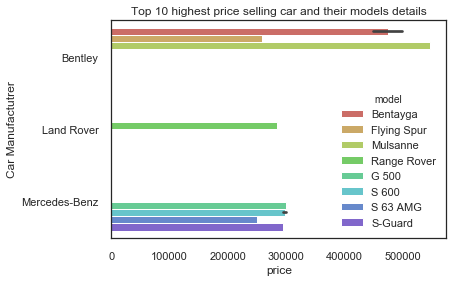

In [180]:
#top5_highest_price_selling_car.plot(x='model',y='price',figsize=(10,5),kind="bar")
sns.barplot(x='price', y='car', data=top10_highest_price_selling_car, orient='h', hue='model',palette=sns.color_palette("hls",10))
plt.title("Top 10 highest price selling car and their models details")
plt.ylabel('Car Manufactutrer')

- Top 10 highest price selling car models details

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

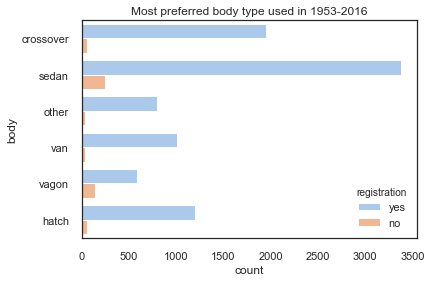

In [170]:
sns.countplot(y='body', data=car_sales, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

Text(0.5, 1.0, 'Number of cars sold based on car size')

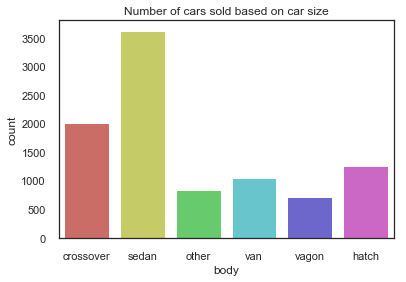

In [176]:
sns.countplot(x='body',data=car_sales,orient='h',palette=sns.color_palette("hls",6))
plt.title("Number of cars sold based on car size")

- Here we can see car brands having "sedan" type of body having maximum registration/sale over the years

Text(0.5, 1.0, 'Most preferred engType used over the years')

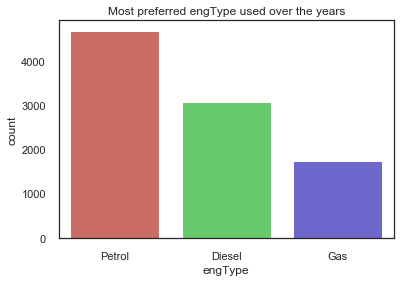

In [169]:
sns.countplot(x='engType', data=car_sales, orient='h',palette=sns.color_palette("hls",3),order=car_sales['engType'].value_counts().index)
plt.title("Most preferred engType used over the years")

- Here we can see car's with the engine type ***Petrol*** have maximum purchase/sells

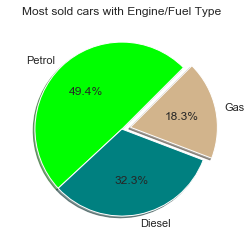

In [182]:
#values=[car_sales['engType'][car_sales['engType']=='Petrol'].counts(),car_sales['engType'][car_sales['engType']=='Diesel'].counts(),car_sales['engType'][car_sales['engType']=='Gas'].counts()]
petrol=car_sales['engType'][car_sales['engType']=='Petrol'].count()
diesel=car_sales['engType'][car_sales['engType']=='Diesel'].count()
gas=car_sales['engType'][car_sales['engType']=='Gas'].count()
values=[petrol,diesel,gas]
values
labels=['Petrol','Diesel','Gas']
cols=['lime','teal','tan']
plt.pie(values,labels=labels,startangle=45,explode=(0,0,0.1),shadow=True,autopct='%1.1f%%',colors=cols)
plt.title("Most sold cars with Engine/Fuel Type")
plt.show()

,year,registration,Reg_Counts
0,2008,yes,1142
1,2007,yes,914
2,2012,yes,749
3,2011,yes,681
4,2013,yes,632


Text(0.5, 1.0, 'Maximum sale/registration per year')

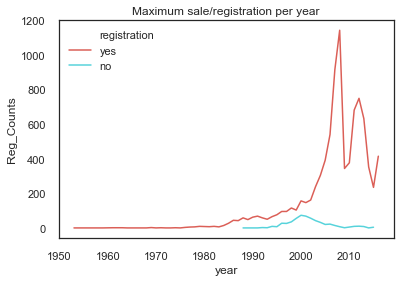

In [162]:
car_sales.sort_values(['car','model','body','mileage','year'])

df = car_sales.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df = pd.DataFrame(df)
df.rename(columns={'registration': 'Reg_Counts'}, inplace=True)
df.reset_index(inplace=True)
display(df.head())
sns.lineplot(data=df, x='year', y='Reg_Counts', hue='registration',palette=sns.color_palette("hls",2))
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Maximum sale/registration per year")

- Above graph shows max sale was done in the Year ***2008***

Text(0.5, 1.0, 'Histogram for total sales in year')

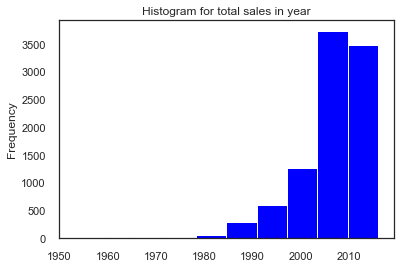

In [157]:
#reviews[reviews['price'] < 200]['price'].plot.hist()
car_sales['year'].plot.hist(color=('blue'))
#plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
plt.title("Histogram for total sales in year")


Text(0.5, 1.0, 'year - price lineplot (2006 - 2016)')

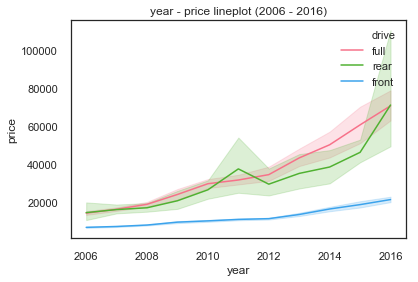

In [145]:
sns.set(style="white")
sns.set_palette("pastel")
#plt.style.use("dark_background")
sns.lineplot(data=car_sales[car_sales.year >= 2006], y='price', x='year', hue='drive',palette=sns.color_palette("husl",3))
plt.title("year - price lineplot (2006 - 2016)")

- Above graph shows the Price distribution over the years, and we can see there has been an increase in price in recent years.

Text(0.5, 1.0, 'Mileage vs Price line plot')

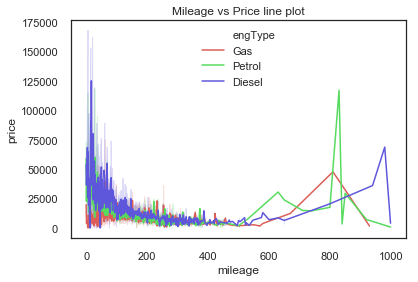

In [149]:
sns.set(style="white")
sns.set_palette("pastel")
#plt.style.use("dark_background")
sns.lineplot(x='mileage',y='price',data=car_sales,hue='engType',palette=sns.color_palette("hls",3))
plt.title("Mileage vs Price line plot")

- The above graph shows relation between ***mileage*** and ***price***. We can't comment on the price increase/decrease over the mileage but this shows, ***price is varying based on mileage too***.

Text(0.5, 1.0, 'Price vs Year w.r.t to engType')

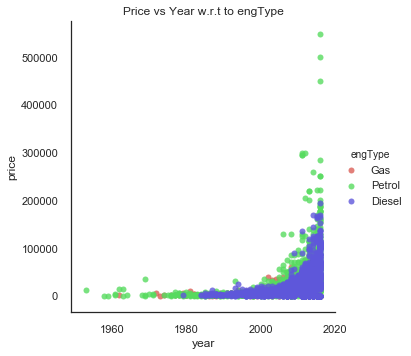

In [165]:
sns.set(style="white")
sns.set_palette("pastel")
#plt.style.use("dark_background")
sns.lmplot('year','price', car_sales, fit_reg=False, hue='engType', palette=sns.color_palette("hls",3))
plt.title("Price vs Year w.r.t to engType")

Text(0.5, 1.0, 'Line graph for Price vs Year w.r.t to engType')

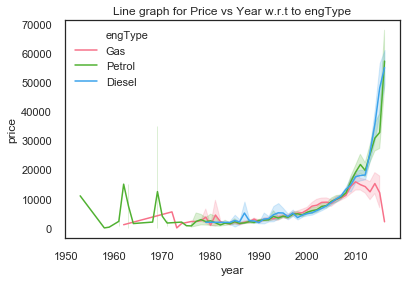

In [166]:
sns.set(style="white")
sns.set_palette("pastel")
#plt.style.use("dark_background")
sns.lineplot(x='year',y='price',data=car_sales,hue='engType',palette=sns.color_palette("husl",3))
plt.title("Line graph for Price vs Year w.r.t to engType")


- Above graph shows the price distribution with respect to engine type. As the years increase, this shows there is significant increase in prices of cars models having engine tyep = "Petrol" as compared to "Gas" and "Diesel".

# Conclusion

- With the help of notebook I learnt how exploratory data analysis can be carried out using Pandas plotting.
- I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
- I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
- Also I have seen making use of packages like matplotlib and seaborn to develop better insights about the data.
- I have seen the impact of columns like mileage, year and engType on the Price increase/decrease rate.
